In [30]:
import sqlite3 as sql
import pandas as pd
import datetime
import csv

In [5]:
conn = sql.connect('Data.sqlite')
fire = pd.read_sql('SELECT * FROM Fires', conn)

In [3]:
type(fire)

pandas.core.frame.DataFrame

In [4]:
fire.shape

(892007, 39)

In [6]:
fire.head(10)

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,...,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,0511,Plumas National Forest,...,A,40.036944,-121.005833,5.0,USFS,CA,63,063,Plumas,b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_@^\xc0...
1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.933056,-120.404444,5.0,USFS,CA,61,061,Placer,b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\x19^\...
2,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17,017,El Dorado,b'\x00\x01\xad\x10\x00\x00\xd0\xa5\xa0W\x13/^\...
3,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.559167,-119.913333,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00\x94\xac\xa3\rt\xfa]...
4,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.559167,-119.933056,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00@\xe3\xaa.\xb7\xfb]\...
5,6,6,FS-1418849,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.635278,-120.103611,5.0,USFS,CA,5,005,Amador,b'\x00\x01\xad\x10\x00\x00\xf0<~\x90\xa1\x06^\...
6,7,7,FS-1418851,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.688333,-120.153333,5.0,USFS,CA,17,017,El Dorado,b'\x00\x01\xad\x10\x00\x00$o\x996\xd0\t^\xc0h\...
7,8,8,FS-1418854,FED,FS-FIRESTAT,FS,USCASHF,Shasta-Trinity National Forest,0514,Shasta-Trinity National Forest,...,B,40.968056,-122.433889,13.0,STATE OR PRIVATE,CA,None,None,None,b'\x00\x01\xad\x10\x00\x00t)\xe8\xd5\xc4\x9b^\...
8,9,9,FS-1418856,FED,FS-FIRESTAT,FS,USCASHF,Shasta-Trinity National Forest,0514,Shasta-Trinity National Forest,...,B,41.233611,-122.283333,13.0,STATE OR PRIVATE,CA,None,None,None,"b'\x00\x01\xad\x10\x00\x00\xdc\x8d\x1e""""\x92^\..."
9,10,10,FS-1418859,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.548333,-120.149167,5.0,USFS,CA,5,005,Amador,b'\x00\x01\xad\x10\x00\x00dS\\\xf2\x8b\t^\xc0\...


In [45]:
fire["DISCOVERY_DATE"].count()

1880465

In [49]:
fire["CONT_DATE"].count()

988934

In [7]:
fire["FIRE_SIZE"].min()

1e-05

In [9]:
fire.dropna(subset=["DISCOVERY_DATE", "DISCOVERY_TIME","CONT_DATE","CONT_TIME"],inplace=True)

In [10]:
def jd2cal(jd_val):
    # print(jd_val)
    mjd_val = int(jd_val-2400000.5)
    #print(mjd_val)
    start_time = datetime.date(1858, 11, 17)
    end_date = start_time + datetime.timedelta(days=mjd_val)
    return end_date.strftime("%m/%d/%Y")
    

In [11]:
import numpy as np
import haversine as hs

fire.head()
df = pd.DataFrame()

print(min(fire["LATITUDE"]))
print(max(fire["LATITUDE"]))
print(min(fire["LONGITUDE"]))
print(max(fire["LONGITUDE"]))

bottomLeft = (min(fire["LATITUDE"]), min(fire["LONGITUDE"]))
bottomRight = (min(fire["LATITUDE"]), max(fire["LONGITUDE"]))
topLeft = (max(fire["LATITUDE"]), min(fire["LONGITUDE"]))
topRight = (max(fire["LATITUDE"]), max(fire["LONGITUDE"]))

length = hs.haversine(bottomLeft,bottomRight)
width = hs.haversine(bottomLeft,topLeft)
print(length)
print(width)

cols = np.linspace(bottomLeft[1], bottomRight[1], num=600)
rows = np.linspace(bottomLeft[0], topLeft[0], num=300)
#cols = [round(num,8) for num in cols]
#rows = [round(num,8) for num in rows]

df_cols = np.searchsorted(cols, fire["LONGITUDE"])
df_row = np.searchsorted(rows, fire["LATITUDE"])

col = [str('%.4f'%round(int,4)) for int in cols[df_cols]]
row = [str('%.4f'%round(int,4)) for int in rows[df_row]]

temp = []
for index,val in enumerate(col):
    temp.append(col[index]+','+row[index])

df["LONGITUDE"] = fire["LONGITUDE"]
df["LATITUDE"] = fire["LATITUDE"]
df["LONG/LAT"] = temp
df["DISCOVERY_DATE"] = fire["DISCOVERY_DATE"]
df["DISCOVERY_TIME"] = fire["DISCOVERY_TIME"]
df["CONT_DATE"] = fire["CONT_DATE"]
df["CONT_TIME"] = fire["CONT_TIME"]
df["FIRE_SIZE"] = fire["FIRE_SIZE"]
#df["STAT_CAUSE_DESCR"] = fire["STAT_CAUSE_DESCR"]
#df["LONG"] = cols[df_cols]
#df["LAT"] = rows[df_row]
#df = df.sort_values(by=["LONG","LAT"])

df.to_csv('Data_with_category.csv')

17.93972222
70.3306
-168.87
-65.25694444
10762.116332162086
5825.607858252318


In [70]:
gk = df.groupby("LONG/LAT")

In [71]:
LL_list = df["LONG/LAT"].unique()
LL_list = LL_list.tolist()
print(len(LL_list))

23798


In [72]:
Dataset_list = []
Data_csv_list = []
for LL in LL_list:
    temp_list = [None]*4
    LL_df = gk.get_group(LL)
    # if(len(LL_df) > 3):
    #     LL_df = LL_df.sample(3)
    LL_df = LL_df.sort_values(by=["DISCOVERY_DATE"],ascending=False)
    LL_df = LL_df.head(1)
    Dataset_list.append(LL_df)
    temp_list[0] = LL.split(',')[0]
    temp_list[1] = LL.split(',')[1]
    temp_list[2] = jd2cal(LL_df['DISCOVERY_DATE']+83)
    temp_list[3] = jd2cal(LL_df['CONT_DATE']+90)
    Data_csv_list.append(temp_list)
    

In [ ]:
Dataset_list[0]

In [10]:
import csv
with open('Data.csv', 'w', newline='') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=',',quotechar='|', quoting=csv.QUOTE_MINIMAL)
    # spamwriter.writerow(['lat', 'long'])
    for val in Data_csv_list:
        # temp = val.split(',')
        spamwriter.writerow([val[0], val[1], val[2], val[3]])

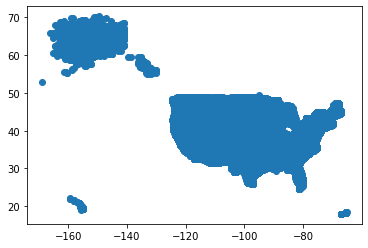

In [25]:
import csv
import matplotlib.pyplot as plt

fire_x = []
fire_y = []

with open('Data.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
    for row in spamreader:
        temp = row
        fire_x.append(temp[0])
        fire_y.append(temp[1])

plt.scatter(x=fire["LONGITUDE"], y=fire["LATITUDE"])
plt.show()

In [26]:
import os
files = os.listdir('Data_Files')
coor = []

for file in files:
    file = file.split('_')
    coor.append(str('%.4f'%float('-'+file[6].replace('d','.').replace('W','')))+','+str('%.4f'%float(file[5].replace('d','.').replace('N',''))))

In [27]:
new_data = []
for element in Data_csv_list:
    temp_ele = str(element[0])+','+str(element[1])
    if temp_ele not in coor:
        new_data.append(element)
print(len(new_data))

0


In [28]:
import csv
with open('Data.csv', 'w', newline='') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=',',quotechar='|', quoting=csv.QUOTE_MINIMAL)
    # spamwriter.writerow(['lat', 'long'])
    for val in new_data:
        spamwriter.writerow([val[0], val[1], val[2], val[3]])

In [10]:
import os
files = os.listdir('Data_Files')
file_list = []

for file_name in files:
    file = file_name.split('_')
    file_list.append([file_name, str('%.4f'%float('-'+file[6].replace('d','.').replace('W','')))+','+str('%.4f'%float(file[5].replace('d','.').replace('N','')))])

In [2]:
import os
files = os.listdir('Fire_Files')
Fire_Files = {}

for file_name in files:
    file = file_name.split('_')
    location = str('%.4f'%float('-'+file[6].replace('d','.').replace('W','')))+','+str('%.4f'%float(file[5].replace('d','.').replace('N','')))
    Fire_Files[location] = file_name

files = os.listdir('No_Fire_Files')
No_Fire_Files = {}

for file_name in files:
    file = file_name.split('_')
    location = str('%.4f'%float('-'+file[6].replace('d','.').replace('W','')))+','+str('%.4f'%float(file[5].replace('d','.').replace('N','')))
    No_Fire_Files[location] = file_name

In [28]:
def get_dur(row):
    start_date_str = jd2cal(row["DISCOVERY_DATE"])
    start_date_str = start_date_str + ' '
    start_date_str = start_date_str + str(row["DISCOVERY_TIME"])
    start_date = datetime.datetime.strptime(start_date_str, '%m/%d/%Y %H%M')

    end_date_str = jd2cal(row["CONT_DATE"])
    end_date_str = end_date_str + ' '
    end_date_str = end_date_str + str(row["CONT_TIME"])
    end_date = datetime.datetime.strptime(end_date_str, '%m/%d/%Y %H%M')
    diff = (end_date-start_date).total_seconds() / 3600.0
    return diff 
    # (end_date-start_date).astype('timedelta64[h]')

In [29]:
get_dur(df.loc[0])

4.5

In [69]:
Data_final = pd.DataFrame()
index = 0

with open('dict.csv', 'w') as csv_file:  
    writer = csv.writer(csv_file)
    for index, row in enumerate(Dataset_list):
        Data_temp = {}
        Data_temp["LONGITUDE"] = row["LONGITUDE"]
        Data_temp["LATITUDE"] = row["LATITUDE"]
        Data_temp["DISCOVERY_DATE"] = jd2cal(row["DISCOVERY_DATE"])
        Data_temp["DUR"] = get_dur(row)
        Data_temp["FIRE_SIZE"] = row["FIRE_SIZE"]

        with open('Fire_Files/'+Fire_Files[row["LONG/LAT"]], newline='') as csvfile:
            spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
            for i in range(0,28):
                next(spamreader)
            for ind,line in enumerate(spamreader):
                Data_temp["T2M_"+str(ind)] = line[3]
                Data_temp["RH2M_"+str(ind)] = line[11]
                Data_temp["PS_"+str(ind)] = line[13]
                Data_temp["WS10M_"+str(ind)] = line[14]

        # for key, value in Data_temp.items():
        #     writer.writerow([key, value])
        #Data_final.append(Data_temp,ignore_index=True)
        # Data_final = pd.concat([Data_final, pd.DataFrame(Data_temp,index=[0])], ignore_index=True)

        Data_temp["DUR"] = 0
        Data_temp["FIRE_SIZE"] = 0
        Data_temp["DISCOVERY_DATE"] = jd2cal(row['CONT_DATE']+90)
        with open('No_Fire_Files/'+No_Fire_Files[row["LONG/LAT"]], newline='') as csvfile:
            spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
            for i in range(0,28):
                next(spamreader)
            for ind,line in enumerate(spamreader):
                Data_temp["T2M_"+str(ind)] = line[3]
                Data_temp["RH2M_"+str(ind)] = line[11]
                Data_temp["PS_"+str(ind)] = line[13]
                Data_temp["WS10M_"+str(ind)] = line[14]

        # Data_final = pd.concat([Data_final, pd.DataFrame(Data_temp,index=[0])], ignore_index=True)
        # Data_final = Data_final.append(Data_temp,ignore_index=True)
        # for key, value in Data_temp.items():
        #     writer.writerow([key, value])

        if(index%50==0):
            print(index)

0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
1400
1450
1500
1550
1600
1650
1700
1750
1800
1850
1900
1950
2000
2050
2100
2150
2200
2250
2300
2350
2400
2450
2500
2550
2600
2650
2700
2750
2800
2850
2900
2950
3000
3050
3100
3150
3200
3250
3300
3350
3400
3450
3500
3550
3600
3650
3700
3750
3800
3850
3900
3950
4000
4050
4100
4150
4200
4250
4300
4350
4400
4450
4500
4550
4600
4650
4700
4750
4800
4850
4900
4950
5000
5050
5100
5150
5200
5250
5300
5350
5400
5450
5500
5550
5600
5650
5700
5750
5800
5850
5900
5950
6000
6050
6100
6150
6200
6250
6300
6350
6400
6450
6500
6550
6600
6650
6700
6750
6800
6850
6900
6950
7000
7050
7100
7150
7200
7250
7300
7350
7400
7450
7500
7550
7600
7650
7700
7750
7800
7850
7900
7950
8000
8050
8100
8150
8200
8250
8300
8350
8400
8450
8500
8550
8600
8650
8700
8750
8800
8850
8900
8950
9000
9050
9100
9150
9200
9250
9300
9350
9400
9450
9500
9550
9600
9650
9700
9750
9800
9850
9900
9950
10000
10050
10100
10150

KeyboardInterrupt: 

In [65]:
Data_final.shape

(0, 0)

In [ ]:
Data_final.to_csv('Data_final.csv')

In [58]:
Data_final = pd.DataFrame()
row = df.loc[0]

Data_temp = {}
Data_temp["LONGITUDE"] = row["LONGITUDE"]
Data_temp["LATITUDE"] = row["LATITUDE"]
Data_temp["DISCOVERY_DATE"] = jd2cal(row["DISCOVERY_DATE"])
Data_temp["DUR"] = get_dur(row)
Data_temp["FIRE_SIZE"] = row["FIRE_SIZE"]

with open('Fire_Files/'+Fire_Files[row["LONG/LAT"]], newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
    for i in range(0,28):
        next(spamreader)
    for index,line in enumerate(spamreader):
        Data_temp["T2M_"+str(index)] = line[3]
        Data_temp["RH2M_"+str(index)] = line[11]
        Data_temp["PS_"+str(index)] = line[13]
        Data_temp["WS10M_"+str(index)] = line[14]

Data_final = Data_final.append(Data_temp,ignore_index=True)

Data_temp["DUR"] = 0
Data_temp["FIRE_SIZE"] = 0
Data_temp["DISCOVERY_DATE"] = jd2cal(row['CONT_DATE']+90)
with open('No_Fire_Files/'+No_Fire_Files[row["LONG/LAT"]], newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
    for i in range(0,28):
        next(spamreader)
    for index,line in enumerate(spamreader):
        Data_temp["T2M_"+str(index)] = line[3]
        Data_temp["RH2M_"+str(index)] = line[11]
        Data_temp["PS_"+str(index)] = line[13]
        Data_temp["WS10M_"+str(index)] = line[14]

Data_final = Data_final.append(Data_temp,ignore_index=True)
Data_final

,LONGITUDE,LATITUDE,DISCOVERY_DATE,DUR,FIRE_SIZE,T2M_0,RH2M_0,PS_0,WS10M_0,T2M_1,...,PS_4,WS10M_4,T2M_5,RH2M_5,PS_5,WS10M_5,T2M_6,RH2M_6,PS_6,WS10M_6
0,-121.005833,40.036944,02/02/2005,4.5,0.1,1.58,73.25,86.85,1.7,4.17,...,87.01,2.12,3.39,94.88,87.09,2.78,4.71,94.81,87.17,2.12
1,-121.005833,40.036944,05/03/2005,0.0,0.0,6.94,62.38,86.93,1.27,7.43,...,86.33,2.67,6.73,96.69,85.62,5.09,1.9,94.0,85.64,3.88


In [56]:
Data_final

""
